In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/Student_Performance.csv')


data.isna().sum() # No null values in the dataset.

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [8]:
dict = {"Yes" : 1, "No" : 0}

data['Extracurricular Activities'] = data['Extracurricular Activities'].map(dict) # Converted every column to numeric.

data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [9]:
data.corr()['Performance Index'] # Most with -> Previous Score, Hours studied.

,Performance Index
Hours Studied,0.373730
Previous Scores,0.915189
Extracurricular Activities,0.024525
Sleep Hours,0.048106
Sample Question Papers Practiced,0.043268
Performance Index,1.000000


In [10]:
data = data.drop_duplicates()

data.shape

(9873, 6)

In [11]:
Y = data['Performance Index']
X = data.drop(columns = 'Performance Index')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X # Scaled the X to numbers between 0 and 1 based on the minimum and maximum value, this is done because one column has range 0-100, while others have 0-10.

array([[0.75      , 1.        , 1.        , 1.        , 0.11111111],
       [0.375     , 0.71186441, 0.        , 0.        , 0.22222222],
       [0.875     , 0.18644068, 1.        , 0.6       , 0.22222222],
       ...,
       [0.625     , 0.72881356, 1.        , 0.8       , 0.55555556],
       [1.        , 0.96610169, 1.        , 0.6       , 0.        ],
       [0.75      , 0.57627119, 0.        , 0.8       , 0.11111111]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, Y_train)

reg.intercept_ # B

11.455220457692121

In [15]:
reg.coef_ # Slopes

array([22.79530678, 60.06410608,  0.60411544,  2.40820477,  1.74718175])

In [35]:
Y_pred = reg.predict(X_test)

import math

for i in range(Y_pred.shape[0]):
  Y_pred[i] = math.floor(Y_pred[i])

Y_pred

array([65., 82., 60., ..., 51., 38., 44.])

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error(Y_test, Y_pred) # on any average 1.6 off every prediction.

1.6106329113924052

In [37]:
r2_score(Y_test, Y_pred) # 0.98 basically means this is a very good predictor.

0.9885350118413347

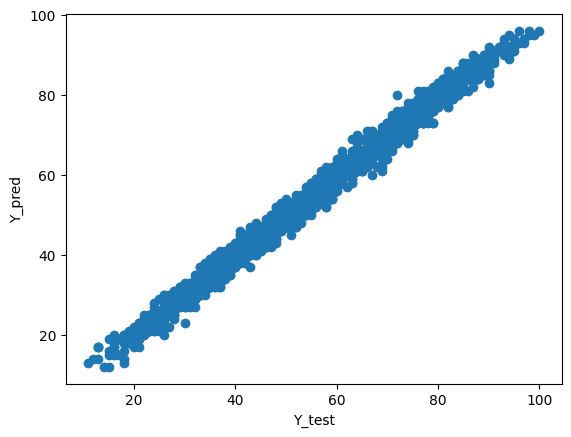

In [38]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, Y_pred)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show() # Basically a straight line which means almost exact predictions.

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

def predictor():

  hours_studied = int(input("Enter hours studied on an average: "))
  prev_score = int(input("Enter average previous scores: "))
  extra = int(input("Do you have any extra-curricular activites: "))
  sleep = int(input("Enter your sleep hours: "))
  sample = int(input("Enter how many sample papers have your practiced: "))

  arr = np.array([hours_studied, prev_score, extra, sleep, sample])

  arr = scaler.transform([arr])

  pred_performance = math.floor(reg.predict(arr))

  print("Your Final performance is: ", pred_performance)

predictor()

Enter hours studied on an average: 7
Enter average previous scores: 99
Do you have any extra-curricular activites: 1
Enter your sleep hours: 9
Enter how many sample papers have your practiced: 1
Your Final performance is:  92
